In [2]:
#fastai library
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *
'''
!pip install azure-cognitiveservices-search-imagesearch
from utils import *
'''

'\n!pip install azure-cognitiveservices-search-imagesearch\nfrom utils import *\n'

In [4]:
#I use google colab and mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
'''
#using bing image search api
import os
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

#download nike, adidas, reebok Shoes images
category = 'nike','adidas','reebok'
path = Path('/content/drive/MyDrive/shoes')

for i in category:
    img_urls = search_images_bing_many(key,f'{i} shoes', total_count=800)
    download_images(f'/content/drive/MyDrive/shoes/{i}', urls=img_urls)

#also download nike, adidas, reebok 'sneakers' images and  nike, adidas, reebok 'running shoes' for nore data

kind_of_shoes = 'sneakers','running shoes'

for i in category:
    for j in kind_of_shoes:
        img_urls = search_images_bing_many(key,f'{i} {j}', total_count= 800)
        download_images(f'/content/drive/MyDrive/shoes/{i}', urls=img_urls)

'''

"\n#using bing image search api\nimport os\nkey = os.environ.get('AZURE_SEARCH_KEY', 'XXX')\n\n#download nike, adidas, reebok Shoes images\ncategory = 'nike','adidas','reebok'\npath = Path('/content/drive/MyDrive/shoes')\n\nfor i in category:\n    img_urls = search_images_bing_many(key,f'{i} shoes', total_count=800)\n    download_images(f'/content/drive/MyDrive/shoes/{i}', urls=img_urls)\n\n#also download nike, adidas, reebok 'sneakers' images and  nike, adidas, reebok 'running shoes' for nore data\n\nkind_of_shoes = 'sneakers','running shoes'\n\nfor i in category:\n    for j in kind_of_shoes:\n        img_urls = search_images_bing_many(key,f'{i} {j}', total_count= 800)\n        download_images(f'/content/drive/MyDrive/shoes/{i}', urls=img_urls)\n\n"

In [6]:
#unlink images that are worng
import os

path = Path('/content/drive/MyDrive/shoes')
'''
image = get_image_files(path)
failed = verify_images(image)
failed.map(Path.unlink)
'''

'\nimage = get_image_files(path)\nfailed = verify_images(image)\nfailed.map(Path.unlink)\n'

In [7]:
#create datablock

shoes_datablock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter =RandomSplitter(valid_pct=0.3,seed=42),
    get_y = parent_label,
    item_tfms = Resize(256)
)

#use dataloaders for using shoes images
dls_shoes = shoes_datablock.dataloaders(path)
#show valid set
#dls_shoes.valid.show_batch(max_n = 8)
#show train set
#dls_shoes.train.show_batch(max_n = 8)

In [8]:
#use RandomResizedCrop and randomly select part of the images
shoes_datablock = shoes_datablock.new(
    item_tfms=RandomResizedCrop(256,min_scale=0.2)
    )

#use aug_transforms and create random variations of images
shoes_datablock = shoes_datablock.new(
    item_tfms = Resize(256),batch_tfms=aug_transforms(mult=1.5)
    )

dls_shoes = shoes_datablock.dataloaders(path)

In [9]:
#use cnn_learner and find optinal learning rate
learn = cnn_learner(dls_shoes,resnet50,metrics=error_rate)
learn.fine_tune(1)
lr_min,lr_steep = learn.lr_find()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.636079,1.091393,0.341826,10:23


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.011448,0.801054,0.237792,01:33


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [10]:
#learn.export()

In [12]:
#fit one cycle with lr_min
learn.fit_one_cycle(3, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.541138,0.564012,0.171975,01:34
1,0.436679,0.532525,0.142251,01:33
2,0.322794,0.465269,0.124204,01:33


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

SuggestedLRs(lr_min=5.754399462603033e-05, lr_steep=6.309573450380412e-07)

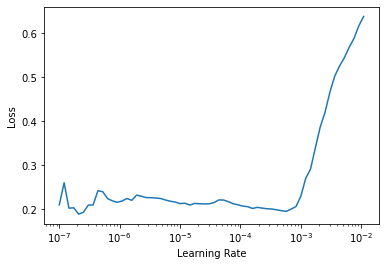

In [13]:
learn.unfreeze()
learn.lr_find()

In [14]:
learn.fit_one_cycle(13, lr_max=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.200699,0.467191,0.123142,01:33
1,0.186189,0.448335,0.122081,01:34
2,0.171697,0.465531,0.116773,01:34
3,0.167005,0.514788,0.131635,01:34
4,0.141720,0.485901,0.123142,01:34
5,0.126424,0.557941,0.125265,01:34
6,0.103596,0.499088,0.121019,01:34
7,0.098617,0.517464,0.112527,01:34
8,0.074079,0.508164,0.110403,01:34
9,0.055196,0.524312,0.116773,01:34


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

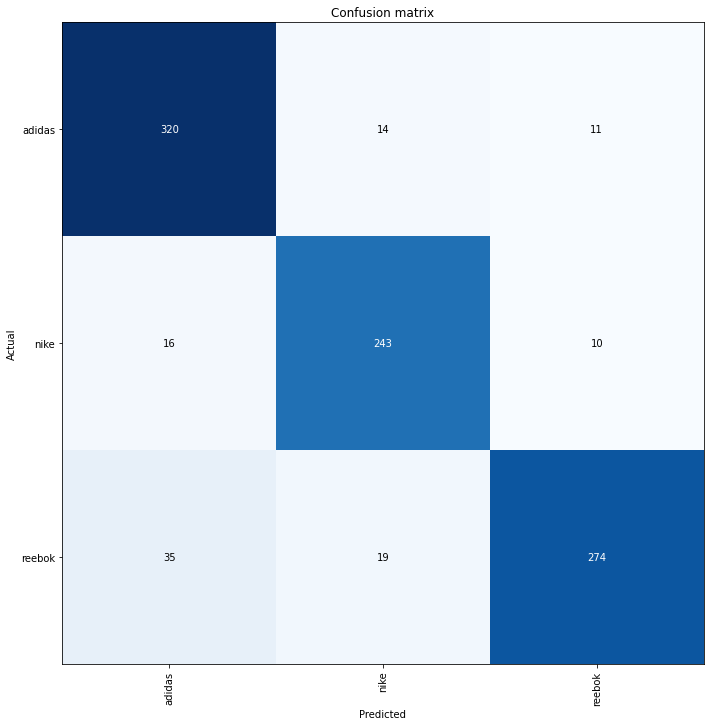

In [15]:
#confuseion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

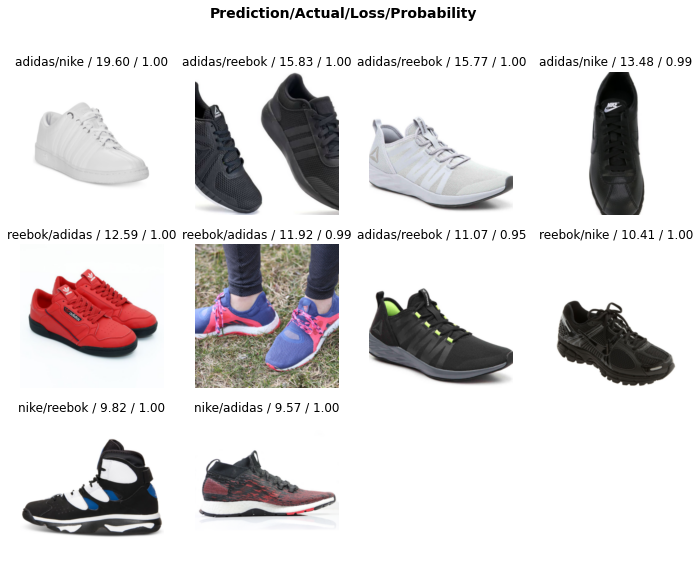

In [16]:
#the five images that has the biggest loss
interp.plot_top_losses(10,)
interp.plot_top_losses(10,figsize=())

In [17]:
#export the model
learn.export()

In [1]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

NameError: ignored